In [42]:
import matplotlib
%matplotlib nbagg


from mpl_toolkits.basemap import Basemap, cm
# requires netcdf4-python (netcdf4-python.googlecode.com)
from netCDF4 import Dataset as NetCDFFile
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


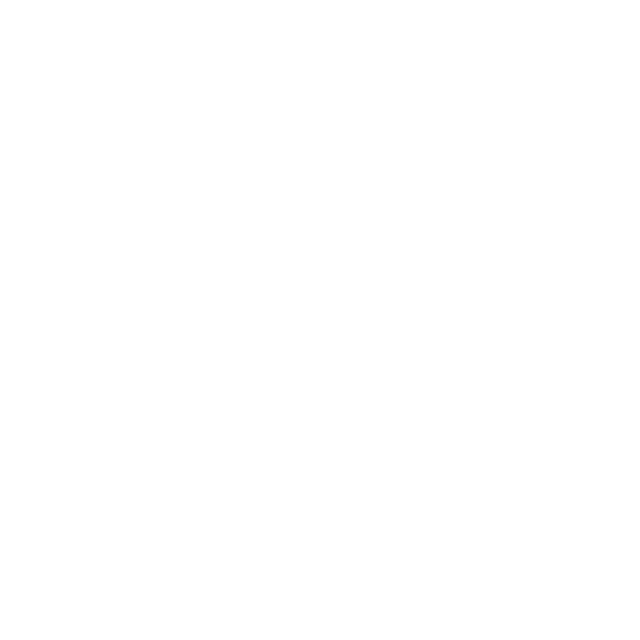

ValueError: zero-size array to reduction operation maximum which has no identity

In [43]:


# plot rainfall from NWS using special precipitation
# colormap used by the NWS, and included in basemap.

nc = NetCDFFile('http://reacchpna.org/thredds/dodsC/agg_met_tmmx_1979_2015_WUSA.nc?lon[0:1:1385],lat[0:1:584],daily_maximum_temperature[0:1:0][0:1:0][0:1:0],day[0:1:10]')
# data from http://water.weather.gov/precip/
data = nc.variables['daily_maximum_temperature'][0:2]
#data = 0.01*prcpvar[:]
latcorners = nc.variables['lat'][:]
loncorners = -nc.variables['lon'][:]
#lon_0 = nc.variables['true_lon'].getValue()
#lat_0 = nc.variables['true_lat'].getValue()
# create figure and axes instances
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
# create polar stereographic Basemap instance.
m = Basemap(width=12000000,height=8000000,
            resolution='l',projection='stere',\
            lat_ts=45,lat_0=45,lon_0=-107.)
# draw coastlines, state and country boundaries, edge of map.
m.drawcoastlines()
m.drawstates()
m.drawcountries()
# draw parallels.
parallels = np.arange(0.,90,10.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# draw meridians
meridians = np.arange(180.,360.,10.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
ny = data.shape[1]; nx = data.shape[2]
lons, lats = np.meshgrid(nx, ny) # get lat/lons of ny by nx evenly space grid.


x, y = m(lons, lats) # compute map proj coordinates.
# draw filled contours.
clevs = [0,1,2.5,5,7.5,10,15,20,30,40,50,70,100,150,200,250,300,400,500,600,750]
cs = m.contourf(x,y,data,clevs,cmap=cm.s3pcpn)
# add colorbar.
cbar = m.colorbar(cs,location='bottom',pad="5%")
cbar.set_label('mm')
# add title
plt.title(prcpvar.long_name+' for period ending '+prcpvar.dateofdata)
plt.show()

In [15]:
nx

585

In [16]:
ny

1

In [17]:
data.shape

(1, 585, 1386)

In [28]:
x.shape

(1386, 585)

In [29]:
y.shape

(1386, 585)

In [31]:
lats

array([[  1.59206907,   1.64049541,   1.68886769, ...,   1.68886795,
          1.64049554,   1.59206907],
       [  1.62898301,   1.67746314,   1.7258892 , ...,   1.72588946,
          1.67746327,   1.62898301],
       [  1.6659004 ,   1.71443435,   1.76291422, ...,   1.76291448,
          1.71443448,   1.6659004 ],
       ..., 
       [ 44.42160409,  44.5515726 ,  44.6816834 , ...,  44.6816841 ,
         44.55157294,  44.42160409],
       [ 44.43628353,  44.56627368,  44.69640628, ...,  44.69640698,
         44.56627402,  44.43628353],
       [ 44.45092391,  44.58093555,  44.7110898 , ...,  44.71109049,
         44.58093589,  44.45092391]])

In [33]:
data.shape

(1, 585, 1386)

In [35]:
data[1:,1:,1:]

masked_array(data =
 [],
             mask =
 [],
       fill_value = -9999.0)

In [36]:
data.shape

(1, 585, 1386)